In this Notebook I will show how teach Recurrent Neural Network to understand month order (or any other order).

### Import

In [1]:
!pip install -q keras
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import os
import random as rn
import numpy as np

# Randomness control
os.environ['PYTHONHASHSEED'] = '0'
RANDOM_SEED = 3939
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, 
                              inter_op_parallelism_threads=1)

tf.set_random_seed(RANDOM_SEED)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
keras.backend.set_session(sess)

Using TensorFlow backend.


### Constants

In [0]:
MONTH_LIST = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
              "Oct", "Nov", "Dec"]

SEQ_LENGTH = 1
FEATURE_NUM = 1

### Prepare data

Prepare `month_to_id` and `id_to_month` dictionaries.

In [3]:
month_to_id = dict((m, i) for i, m in enumerate(MONTH_LIST))
for m, id in month_to_id.items():
  print(m, id)

('Mar', 2)
('Feb', 1)
('Aug', 7)
('Sep', 8)
('Apr', 3)
('Jun', 5)
('Jul', 6)
('Jan', 0)
('May', 4)
('Nov', 10)
('Dec', 11)
('Oct', 9)


In [4]:
id_to_month = dict((i, m) for i, m in enumerate(MONTH_LIST))
for id, month in id_to_month.items():
  print(id, month)

(0, 'Jan')
(1, 'Feb')
(2, 'Mar')
(3, 'Apr')
(4, 'May')
(5, 'Jun')
(6, 'Jul')
(7, 'Aug')
(8, 'Sep')
(9, 'Oct')
(10, 'Nov')
(11, 'Dec')


Encoding data into input/output sequences

In [7]:
def data_to_sequence(data, data_to_id_dict):
    seq_Xs, seq_ys = list(), list()
    
    for i in range(0, len(data) - SEQ_LENGTH):
        seq_X = data[i:i + SEQ_LENGTH]
        seq_y = data[i + SEQ_LENGTH]
        
        seq_Xs.append([data_to_id_dict[i] for i in seq_X])
        seq_ys.append(data_to_id_dict[seq_y])
        
    return seq_Xs, seq_ys
    
seq_Xs, seq_ys = data_to_sequence(MONTH_LIST, month_to_id)

print("X sequences: \n{}".format(seq_Xs))
print("y sequences: \n{}".format(seq_ys))

X sequences: 
[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y sequences: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


Assemble train_X, train_y

In [0]:
train_X = np.reshape(seq_Xs, (len(seq_Xs), SEQ_LENGTH, FEATURE_NUM))
train_y = keras.utils.to_categorical(seq_ys)

Normalize

In [0]:
train_X = train_X / float(len(MONTH_LIST))

### Model

Structure

In [0]:
model = Sequential([
    LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2])),
    Dense(train_y.shape[1], activation='softmax')   
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(), 
              metrics=['accuracy'])

Training

In [0]:
history = model.fit(train_X, train_y, 
                    epochs=500, 
                    batch_size=1, 
                    verbose=0, 
                    shuffle=False)

Evaluation

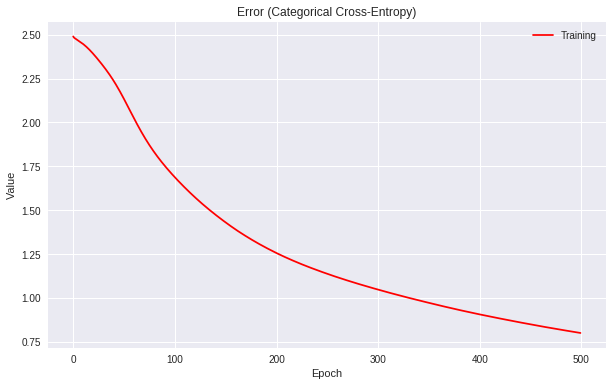

In [18]:
f, ax = plt.subplots()
f.set_size_inches(10, 6)
    
ax.plot(history.history["loss"], c="r")
ax.set_title("Error (Categorical Cross-Entropy)")
ax.set_ylabel("Value")
ax.set_xlabel("Epoch")
ax.legend(["Training", "Validation"], loc="best");

Prediction

In [0]:
def predict_next_month(data, model, data_to_id_dict, id_to_data_dict):
  month_seq = np.reshape(data_to_id_dict[data], (1, SEQ_LENGTH, FEATURE_NUM))
  month_seq = month_seq / float(len(MONTH_LIST))

  prediction = model.predict(month_seq, verbose=0)
                         
  data_index = np.argmax(prediction)
  return id_to_data_dict[data_index]

In [36]:
for month in MONTH_LIST:
  prediction = predict_next_month(month, model, month_to_id, id_to_month)
  print("{} -> {}".format(month, prediction))

Jan -> Feb
Feb -> Mar
Mar -> Apr
Apr -> May
May -> Jun
Jun -> Jul
Jul -> Aug
Aug -> Sep
Sep -> Oct
Oct -> Nov
Nov -> Dec
Dec -> Dec
